<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;"> Visualització de dades </p>
<p style="margin: 0; text-align:right;">20221 - Màster universitari de Ciències de dades (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
    Joana Llauradó Pont                             A5: Estudi de tècniques de visualització de dades (PAC2)
</div>

In [1]:
import pandas as pd
import geopandas as gpd
import pycountry
import matplotlib.pyplot as plt
import geoplot as gplt
import plotly.express as px
import numpy as np
import plotly.express as px

# CARTOGRAMA 

És una mapa on la geometria de les regions està distorsionada per tal de destacar una informació en concret. Va néxier al voltant dels anys 1860-1870 quan Pierre Pierre Émile Levasseur va representar es països d'Europa en forma de quadrats segons l'economia del païs. L'exemple anterior seria un exemple de cartograma .. però també n'hi poden haver d'altres com observem en la següent classificació. 

<img src="https://upload.wikimedia.org/wikipedia/commons/7/7b/Levasseur_cartogram.png" align="left" width="450px">

<img src="Cartogram-There-are-three-dimensions-that-are-important-for-accurate-reading-of.png" align="right" width="450px">


És una representació que s'usa per corretgir el biaix que torbem en en els mapes tipus choropleth on dues regions de geometria similar però dades molt diferents pot semblar que tinguin la mateixa importancia. Per exemple en el cas de voler plasmar la densitat de població en una àrea, on veiem com un cartograma ens msotra una imatge molt diferent respecte un mapa que representi les àrees dels països. 


<img src= https://populationeducation.org/wp-content/uploads/2019/06/world-population-map-poster.jpg align="middle" width="450px">


Així doncs, alhora de representar cartogrames necessitem dues dades bàsqiues, per una banda les coordenades dels països o àrea que volem representar i per altra banda dades quantitatives que son les que ens distorsiones aquestes dades geomètriques. 


**Enllaços d'interès**
https://www.data-to-viz.com/
https://www.researchgate.net/figure/Cartogram-There-are-three-dimensions-that-are-important-for-accurate-reading-of_fig1_51651296 
https://gisgeography.com/cartogram-maps/

**Codi modificat de:**
https://gregfeliu.medium.com/viewing-population-within-a-country-how-to-create-cartograms-and-visualize-centroids-with-python-205a3d177542 

**Dades extretes de:**
https://ec.europa.eu/eurostat/data/database 
https://gisgeography.com/cartogram-maps/

In [2]:
# Load Geospatial data 
gdf_glb = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
exploded = gdf_glb.explode(index_parts=True)

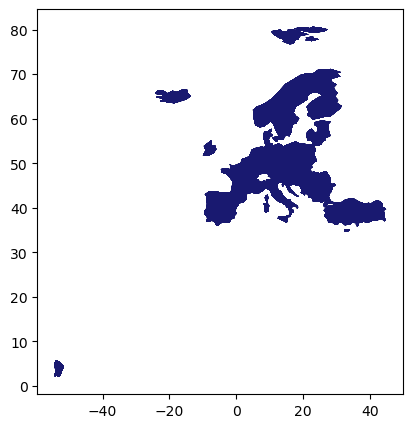

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
exploded.plot(ax=ax,color='midnightblue')
#exploded.apply(lambda x: ax.annotate(text=x['name'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);
plt.show()

In [3]:
# Load health data 
data=pd.read_csv("hlth_ehis_sk3e.tsv",sep='\t')
data[['unit','smoking','isced11','sex','age','geo']] = data['unit,smoking,isced11,sex,age,geo\\time'].str.split(',', expand=True)

# Clean data - remove "TOTAL"
dff = data.loc[data['smoking'] != "TOTAL"]
dff = dff.loc[data['sex'] != "T"]
dff = dff.loc[data['isced11'] != "TOTAL"]
dff = dff.loc[data['age'] != "TOTAL"]

In [4]:
# Arrange data - new smoking variable - raw string to clean float
new_count = []
for i in dff["2019 "]:
    new_var = i.replace("u","")
    new_var = new_var.replace(":","")
    if new_var == " ":
        new_var = np.nan
    else:
        new_var = float(new_var)
    new_count.append(new_var)
dff['new_count_2019'] = pd.Series(new_count)
dff = dff[dff['new_count_2019'].notna()]

In [5]:
# Arrange data - get iso_a3 code for countries
iso_a3 = []
for i in dff['geo']:
    new_name = pycountry.countries.get(alpha_2=str(i))
    if new_name != None:
        name2 = new_name.alpha_3
        iso_a3.append(name2)
    else:
        iso_a3.append(new_name)        
dff['iso_a3']=pd.Series(iso_a3)
dff = dff[dff['iso_a3'].notna()]


In [6]:
# Merge geographical and health data 
exploded = exploded.merge(dff, on='iso_a3')

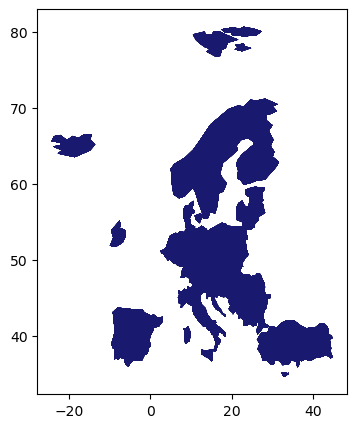

In [8]:
exp = exploded[exploded.name != "France"]
fig, ax = plt.subplots(figsize=(10, 5))
exp.plot(ax=ax,color='midnightblue')
plt.show()

In [16]:
exploded.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,"unit,smoking,isced11,sex,age,geo\time",2019,2014,unit,smoking,isced11,sex,age,geo,new_count_2019
0,5347896.0,Europe,Norway,NOR,403336,"POLYGON ((15.14282 79.67431, 15.52255 80.01608...","PC,SM_GE20D,ED0-2,F,Y15-19,LV",0,0,PC,SM_GE20D,ED0-2,F,Y15-19,LV,0.0
1,5347896.0,Europe,Norway,NOR,403336,"POLYGON ((15.14282 79.67431, 15.52255 80.01608...","PC,SM_GE20D,ED0-2,F,Y15-24,LU",1.0,1.4,PC,SM_GE20D,ED0-2,F,Y15-24,LU,1.9
2,5347896.0,Europe,Norway,NOR,403336,"POLYGON ((15.14282 79.67431, 15.52255 80.01608...","PC,SM_GE20D,ED0-2,F,Y15-44,BG",:,10.2,PC,SM_GE20D,ED0-2,F,Y15-44,BG,3.0
3,5347896.0,Europe,Norway,NOR,403336,"POLYGON ((15.14282 79.67431, 15.52255 80.01608...","PC,SM_GE20D,ED0-2,F,Y15-44,IT",:,3.6,PC,SM_GE20D,ED0-2,F,Y15-44,IT,1.1
4,5347896.0,Europe,Norway,NOR,403336,"POLYGON ((15.14282 79.67431, 15.52255 80.01608...","PC,SM_GE20D,ED0-2,F,Y20-24,AT",7.9 u,36.1 u,PC,SM_GE20D,ED0-2,F,Y20-24,AT,6.8


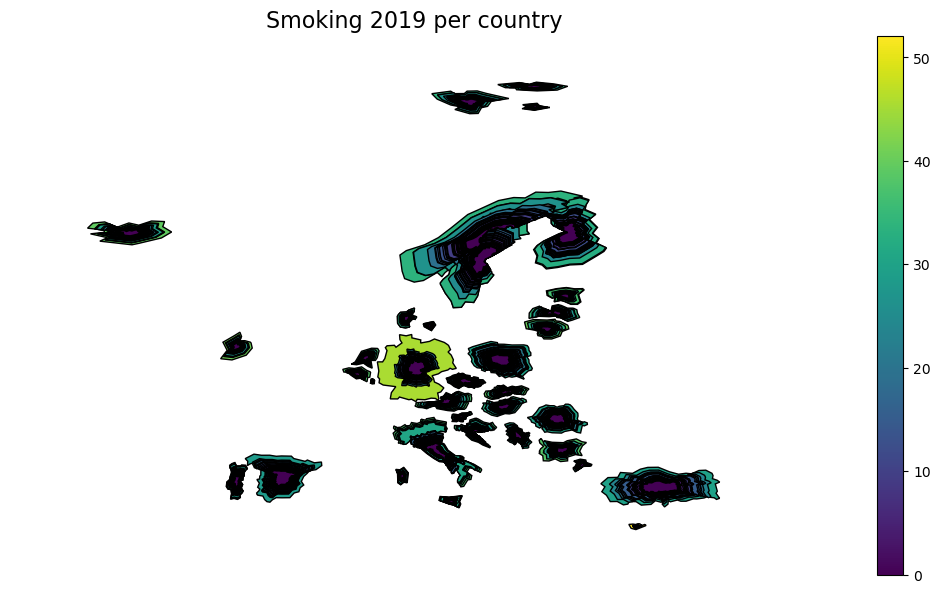

In [12]:
# Exclude france for better visualization
exp = exploded[exploded.name != "France"]

#Plot cartogram
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
gplt.cartogram(exp, 
               ax = ax,
              scale='new_count_2019',
              hue='new_count_2019',
              legend=True, legend_var='hue')
_ = ax.set_title('Smoking 2019 per country', fontsize=16)

Commentaris:
- Espai blanc -> frança que l'hem tret
- Espanya i portugal -> població fuma una mitna a d¡entre 0 - 10 % pobliacó fuma
- Alemania -> prop dels50% de la poblaicó fuma 
- Turquia - baix % de fumadors
- També es podria mirar si el % fuamdors es per sobre o sota dels 20 cigarrets, caldria trasnormar la variable 

# DOT MATRIX CHART

És una representació que serveix per mostrar dades discretes, per tant, com en els cartogrames quantitatives, agrupades en punts que representen una categoria o grup. Son molt útils doncs per mostrar de forma ràpida la distiribució i la proporció de les dades. 
<img src="example1_dotmatrix.jpg"    align="left" width="400px" height= "400px">
<img src="Example2_dotplot.png"    align="right" width="550px" height= "600px">


**Enllaços d'interès**
https://www.forumone.com/insights/blog/good-data-visualization-practices-dot-plots-and-kin/
https://towardsdatascience.com/dotplotpython-c24058dc6689

**Codi basat en**
https://plotly.com/python/plotly-express/




In [22]:
fig = px.scatter(dff, y="geo", x="new_count_2019", color="sex", symbol="sex")
fig.update_traces(marker_size=10)
fig.show()

Commentaris:
- en tots els països hi ha major percentate d'homes fumadors.
- en països com SK (slovakia) o RO (Romania) també hi ha moltes dones fumadors, a diferència de la resta de països

# Contour plot 

És un tipus de gràfica que s'utilitza per representar 3 variables en format 2d, de manera que les variables X i Y serien les predciotires i la Z que serà el contron és la variable resposta. 

Edmond Halley's New and Correct Chart Shewing the Variations of the Compass (1701)

<img src="contour.jpg" align ="middle" height=200px>

Normalment s'usa en cartografia per mostrar en un mapa les elevacions del terrent, però també es poden fer servir per mostrar altres dades com densitat o potencial electric. Per tant, altre cop utilitzarem dades quantitatives. 

<img src=https://miro.medium.com/v2/resize:fit:720/format:webp/1*D7ji7e5bPXEt3zQg55ABVg.png align="middle"> 

Tot i estar fent servir el mateix tipus de dada per totes les gràfiques i en aquest cas seria més adhient tornar a la pàgina inicial d'eurostat i, per exemple, agafar dades que tinguin a veure precisament amb elevcoó del terreny, o superficie o rpfunditat d'aigua en un terrent etc. 

**Definició**: Carograma és una mapa on la geometria de les regions està distorsionada per tal de destacar una informació en concret. 
**Origen**
**Descripció**
**Tipologia de dades**
**Exemples**

**Enllaços d'interès**
https://www.statisticshowto.com/contour-plots/

**Codi extret de**
https://es.mathworks.com/help/matlab/ref/contour.html 
https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html

In [19]:
fig = px.density_contour(dff, x="new_count_2019", y="age")
fig.update_traces(contours_coloring="fill", contours_showlabels = True)
fig.show()